# Data Science - Udacity 

## Introduction

This project analyzes a dataset, provides insights into the data and tries to answer 3 to 5 real-world or business related questions. 

I have picked a dataset from IBM with data from Telecom companies. This data is about "churn" - defined as customers leaving the telcom company for some reason or other. The objective is to analyze and understand the data and then see if we can answer some questions. 

The questions that I would like to address are:

            Q1.Is gender of the client a predictor of churn ?
            
            Q2.Are clients trying the service and switching after a short time ? Meaning does "tenure" matter ?
                  
            Q3.Are contract terms a factor in retention ?
            
            Q4.Are the clients leaving because of cost ?      
   



### About the data

#### This is the description of the telecom dataset from IBM's site - link given here  (https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/)

##### What’s in the Telco Customer Churn data set?

This data set provides info to help you predict behavior to retain customers.  You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business 
for cable competitors. They need to understand who is leaving.

Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [88]:
# import key libraries to be used in this notebook
#    numpy and pandas for data manipulation
#    matplotlib and seaborn for data visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Data input

In [148]:
# Read the data file (in CSV format) and get some basic information
# Using pandas data from the .csv file is read in to a DataFrame calle - telco_ds

telco_ds = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

###  Please note none of the rows/columns are missing any values (which is good as we don't have do a lot of data manipulation)

In [149]:
# Small sample of our data
telco_ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
print (" -----------    Preliminary data analysis -------------- \n")
print ("records (or rows)    : " ,telco_ds.shape[0])
print ("Columns              : " ,telco_ds.shape[1])
print ("\nFeatures (columns) : " ,telco_ds.columns.tolist())
print ("\nMissing values :  ", telco_ds.isnull().sum().values.sum())
print ("\nUnique values :  \n",telco_ds.nunique())

 -----------    Preliminary data analysis -------------- 

records (or rows)    :  7043
Columns              :  21

Features (columns) :  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6

### This analysis shows:
        * There are 7043 records and 21 columns (features) - note "churn" is the last column
        * There are no missing values
        * Customer ID is unique so each record is one unique customer
        * Except for "tenure", "MonthlyCharges" and "TotalCharges" the other fields have 2 or 4 values.
            - examples of churn and payment method values below

In [151]:
telco_ds['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [152]:
telco_ds['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [153]:
telco_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### Senior Citizen, tenure and Monthly charges are numeric fields. We may have to change the type of some columns when we get to process them.

#### Let's look at the overall "churn" data to see in this dataset what is the proportion of clients who stayed vs those that left ("churn")

It can be seen that the data is unbalanced i.e., not evenly distributed indicating a large number of clients continue to stay.

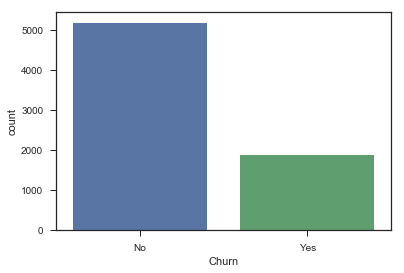

In [154]:
sns.countplot(x="Churn",data=telco_ds);

### More detailed look at each feature and its relation to "churn" in the form of bar charts

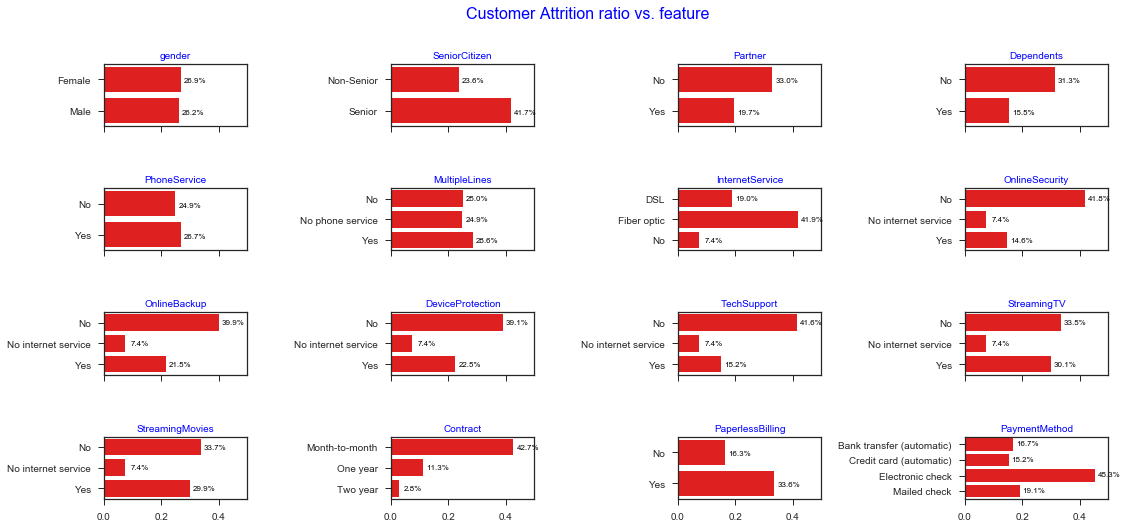

In [155]:
# data in the dataset

telco_ds['SeniorCitizen'] = telco_ds['SeniorCitizen'].apply(lambda x: "Senior" if x==1 else ("Non-Senior" if x==0 else x))

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4,4,figsize=(18,8), sharex=True)

j=0
k=0
    
for i in cols:
    temp = telco_ds.pivot_table(telco_ds, index=[i], columns=['Churn'], aggfunc=len).reset_index()[[i,'tenure']]
    temp.columns=[i,'Churn_N','Churn_Y']
    temp['Churn_ratio']=(temp['Churn_Y'])/(temp['Churn_Y']+temp['Churn_N'])
    
    a = sns.barplot(x='Churn_ratio', y=i, data=temp, ax=ax[j][k], color="red")
    a.set_yticklabels(labels=temp[i])
    for p in ax[j][k].patches:
        ax[j][k].text(p.get_width() + .05, p.get_y() + p.get_height()/1.5, '{:,.1%}'.format(p.get_width()),
                   fontsize=8, color='black', ha='center', va='bottom')
    ax[j][k].set_xlabel('', size=10, color="red")
    ax[j][k].set_ylabel('', size=10, color="green", rotation=0, horizontalalignment='right')
    ax[j][k].set_title(i, size=10, color="blue")
    #print(j,k)
    if k==3: 
        j=j+1
        k=0
    else:
        k=k+1 
    
fig.suptitle("Customer Attrition ratio vs. feature ", fontsize=16, family='sans-serif', color="blue")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=1, hspace=1)
plt.xlim(0,.5)
plt.show()
    

** The above charts show various inferences:
        - Gender does not seem to significatly affect churn 
        - These features seem to influence the churn
            - being a Senior citizen
            - Having a partner or dependents
            - those using fiber optic service
        - Month to month clients seem to churn more 

## 2. A closer look at gender and churn rate

The following pie chart shows that there is no significant relationship of gender to churn.
We can see between the customers who stayed and those who left, it is even between the genders.
So we don't have to focus on this.

### Q1 . Is gender of the client a predictor of churn ? 
####         From this analysis it is safe say gender is not a good predictor of churn.

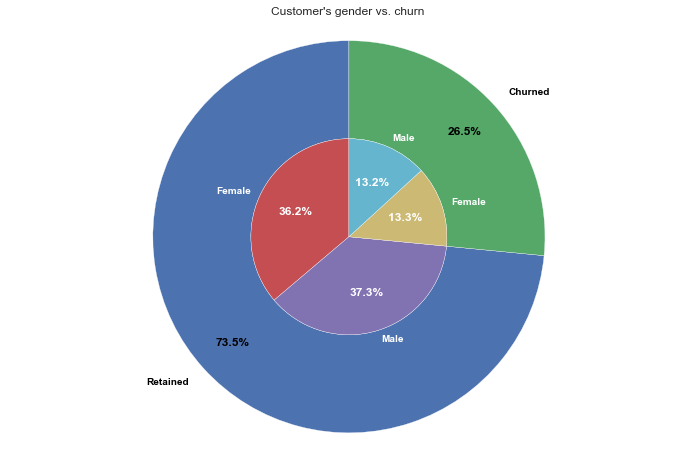

In [147]:
fig, axes = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = telco_ds.Churn.value_counts().sort_index()
axes.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = telco_ds.groupby(["Churn", "gender"]).size().reset_index()
axes.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    
    )

axes.set_title('Customer\'s gender vs. churn')

axes.axis('equal')

plt.show()

## 3. A deeper look at tenure as an indicator of churn propensity

### The distribution chart below shows that most of the client churn is within the initial period of the tenure. As clients stayed with the Telco they tended to stay rather than leave.

### Q2. Are clients trying the service and switching after a short time ? Meaning does "tenure" matter?
####  The analysis shows that the longer clients stay, they are less likely to churn. 


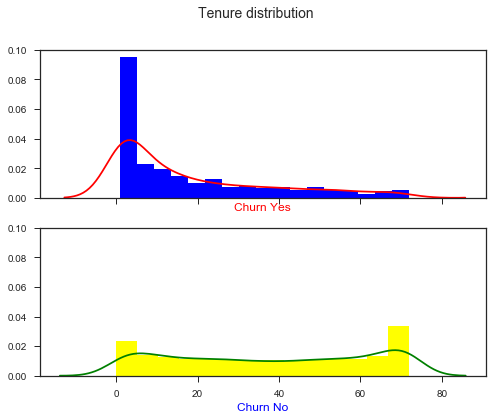

In [156]:
fig, ax = plt.subplots(2, 1, figsize=(8,6), sharey=True, sharex=True)

sns.distplot(telco_ds[telco_ds['Churn']=="Yes"]["tenure"] , color="red", ax=ax[0],hist_kws={"alpha": 1, "color": "blue"})
sns.distplot(telco_ds[telco_ds['Churn']=="No"]["tenure"] , color="green", ax=ax[1],hist_kws={"alpha": 1, "color": "yellow"})
        
ax[0].set_xlabel('Churn Yes', size=12, color="red")
ax[1].set_xlabel('Churn No', size=12, color="blue")
#ax.set_ylabel('Churn', size=14, color="green")
#ax[0].set_title('Tenure distribution', size=18, color="green")
fig.suptitle("Tenure distribution", fontsize=14)
plt.show()

In [160]:
# Create column ChurnN with - Yes = 1 and No = 0
churn_map = {"No": 0, "Yes": 1}
telco_ds['ChurnN'] = telco_ds['Churn'].map(churn_map)

### Let's do additional analysis on tenure. We will group the data by the number of months a client has stayed with the Telco.  We will also look to see if being on a contract vs. paying month to month is a factor also.


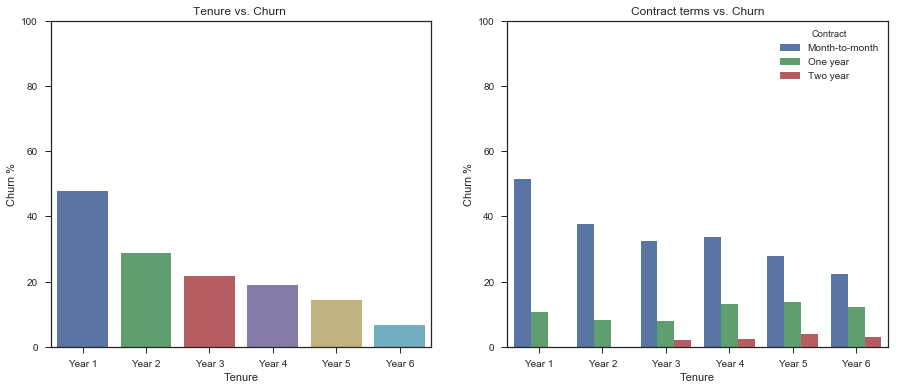

In [161]:
# Divide the tenure into periods
periods = [0, 12, 24, 36, 48, 60, 72]
labels = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6']
telco_ds_tg = telco_ds.copy()
telco_ds_tg['tenureP'] = pd.cut(telco_ds["tenure"], periods, labels=labels)

# Draw a bar plot of tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureP", y=telco_ds_tg.ChurnN*100, data=telco_ds_tg, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Tenure vs. Churn ')

# Draw a bar plot of tenure vs churn vs contract
sns.barplot(x="tenureP", y=telco_ds_tg.ChurnN*100, hue="Contract", data=telco_ds_tg, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('Contract terms vs. Churn')


plt.show()

### The above results show that the longer one stays with the company the churn is less. Most people leave within the 1st year. 

### Over the tenure of clients, it can be seen that the month to month customers were most prone to leave i.e., churn.  

### Q3. Are contract terms a factor in retention ?
####        It seems people on 1 year or 2 year terms tend to stay longer. Month to month clients show a high tendency to leave. 

## 4. Costs - are they a factor ? 

### We will look at Monthly charges if there is any effect on churn

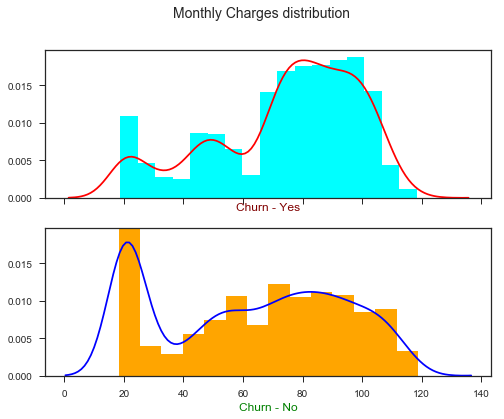

In [162]:
fig, ax = plt.subplots(2, 1, figsize=(8,6), sharey=True, sharex=True)

sns.distplot(telco_ds[telco_ds['Churn']=="Yes"]["MonthlyCharges"] , color="red", ax=ax[0],hist_kws={"alpha": 1, "color": "cyan"})
sns.distplot(telco_ds[telco_ds['Churn']=="No"]["MonthlyCharges"] , color="blue", ax=ax[1],hist_kws={"alpha": 1, "color": "orange"})
        
ax[0].set_xlabel('Churn - Yes', size=12, color="#800000")
ax[1].set_xlabel('Churn - No', size=12, color="green")

fig.suptitle("Monthly Charges distribution", fontsize=14)
plt.show()

### Q3: Are clients leaving because of cost ? 
#### The data shows that we should look at additional factors also. We can check Total Charges also 

In [163]:
# Make a copy of the dataframe so that we can change the TotalCharge datatype to numeric to help us
telco_ds_t=telco_ds.copy()
telco_ds_t['TotalCharges']=telco_ds_t['TotalCharges'].convert_objects(convert_numeric=True)

In [164]:
#telco_ds_t['TotalCharges']=telco_ds_t['TotalCharges'].convert_objects(convert_numeric=True)

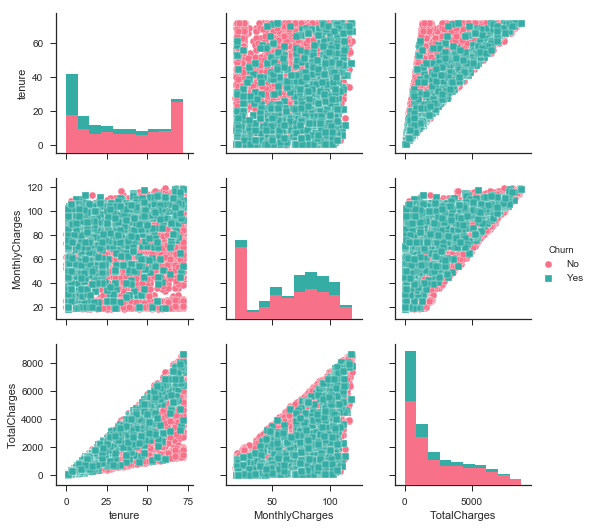

In [165]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(telco_ds_t,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn",palette='husl',markers=['o','s'])

### The above plots show that as the charges increase clients tend to leave. 
### Q4. Are the clients leaving because of cost ? 
#### We can see from the plots above that there is a direct relation of people leaving ("churn") and associated cost. So the answer is "Yes"

## 5. Conclusion

The analysis of the Telco data gives us some insights in to customer behavior. 
It seems clear that 
    (a) The longer one is a customer, the lesser the churn, 
    (b) Cost is a factor and 
    (c) Clients on month to month deals tend to leave sooner than those on 1-year and 2-year contracts
    
We also saw that many of other features did not seem to influence "churn" significantly

## 6. Reflection

I selected this project as studying customer behavior is a major focus of data scientists. They are asked to study behaviors, suggest actions and predict outcomes. 

My attempt here is to focus on data analysis and interpretation using various inference and visualizaton methods. I have not used any Machine Learning in this analysis. By using ML techniques we may be able to refine our findings and may be able to predict who may be the next one to possibly churn. 

Doing this project helped me explore many of the visualization methods using matplotlib and seaborn packages. It was a very educational project. 

